# Classification Project for Machine learning : [ENERGY OUTPUT OF A COMBINED CYCLE POWER PLANT]

## Introduction
# Predicting Energy Output of a Combined Cycle Power Plant
The primary goal of this project is to develop a robust machine learning model capable of accurately predicting the energy output of a Combined Cycle Power Plant based on various environmental variables.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np
import altair as alt

In [4]:
import pandas as pd
df = pd.read_csv('CCPP_data.csv')
df.head()

<ipython-input-4-50e533a22bd3>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [16]:
df = pd.read_csv('CCPP_data.csv')
# Handling missing values
df.fillna(df.mean(), inplace=True)

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_normalized = pd.DataFrame(df_scaled, columns=df.columns)
df_normalized.head()

,AT,V,AP,RH,PE
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666


## Data Cleaning
The dataset was inspected for missing values, which were handled using mean imputation. The data was then normalized to ensure all variables were on a similar scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Load your data
df = pd.read_csv('CCPP_data.csv')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the normalized DataFrame
print(df_normalized.head())


In [ ]:
df = pd.read_csv('CCPP_data.csv')
# Data Exploration
print(df.describe())

# Visualizations
df.hist(figsize=(12, 8))
plt.show()

# Handling missing values
df.fillna(df.mean(), inplace=True)


## Feature Engineering
New features such as temperature gradients and wind speed variations were created to capture potential relationships with energy output.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'CCPP_data.csv'
df = pd.read_csv(file_path)

# Feature Engineering (optional, replace with meaningful features)
df['Temp_Gradient'] = df['AT'] - df['AP']  # Example feature
df['Wind_Speed_Var'] = df['V'] * np.random.normal(0.1, 0.02, size=len(df))

# Define features and target
X = df.drop(columns=['V'])  
y = df['PE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Test MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


## Methodology
The dataset was split into training and testing sets with a 70-30 ratio. A 5-fold cross-validation was used to assess model performance and prevent overfitting.


In [ ]:
print(f"Unique classes in y_train: {np.unique(y_train)}")
print(f"Unique classes in y_test: {np.unique(y_test)}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load the dataset
file_path = 'CCPP_data.csv'
df = pd.read_csv(file_path)

# Feature Engineering (optional, replace with meaningful features)
df['Temp_Gradient'] = df['AT'] - df['AP']  
df['Wind_Speed_Var'] = df['V'] * np.random.normal(0.1, 0.02, size=len(df))

# Define features and target
X = df.drop(columns=['V'])  # Features
y = df['AT']  # Target

# Define bins based on quantiles or custom thresholds

bins = np.percentile(y, [0,1,2])
y_binned = np.digitize(y, bins) - 1  # Convert to classes 0, 1, 2


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg_model = LogisticRegression(penalty='l2', solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression Model with cross-validation
log_reg_cv_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Accuracy:", np.mean(log_reg_cv_scores))

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate Logistic Regression Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Evaluate K-Nearest Neighbors Model with cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("K-Nearest Neighbors CV Accuracy:", np.mean(knn_cv_scores))

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate K-Nearest Neighbors Model
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


## Logistic Regression vs. Other Models
The Logistic Regression model, known for its simplicity and interpretability, provides a solid baseline for classification tasks. Compared to other models such as KNN or Random Forest, it offers the following advantages:

- **Interpretability**: The coefficients of Logistic Regression can be easily interpreted to understand the influence of each feature on the outcome.
- **Efficiency**: Logistic Regression is computationally efficient, making it suitable for large datasets.
- **Regularization**: With L2 regularization, the model prevents overfitting by penalizing large coefficients.

However, Logistic Regression might not perform as well in complex, non-linear problems where models like Random Forest or KNN could excel.


In [ ]:
num_classes_y_test = len(np.unique(y_test))
num_classes_y_score = log_reg_model.predict_proba(X_test_scaled).shape[1]

print(f"Number of classes in y_test: {num_classes_y_test}")
print(f"Number of columns in predicted probabilities: {num_classes_y_score}")


In [ ]:
from collections import Counter
print("Training class distribution:", Counter(y_train))


In [ ]:
log_reg_model = LogisticRegression(C=1.0, class_weight='balanced', multi_class='ovr')


Logistic Regression CV Accuracy: 0.9828281297024958
Logistic Regression Accuracy: 0.9839777081156391
Logistic Regression Classification Report:


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.39      0.56        31
           1       0.00      0.00      0.00        27
           2       0.98      1.00      0.99      2813

    accuracy                           0.98      2871
   macro avg       0.66      0.46      0.52      2871
weighted avg       0.97      0.98      0.98      2871

Logistic Regression Confusion Matrix:
K-Nearest Neighbors CV Accuracy: 0.9880541281642572
K-Nearest Neighbors Accuracy: 0.9867641936607454
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.41      0.41      0.41        27
           2       0.99      0.99      0.99      2813

    accuracy                           0.99      2871
   macro avg       0.74      0.74      0.74      2871
weighted avg       0.99      0.99      0.99      2871

K-Nearest Neighbors Confusion Matrix:
                 M

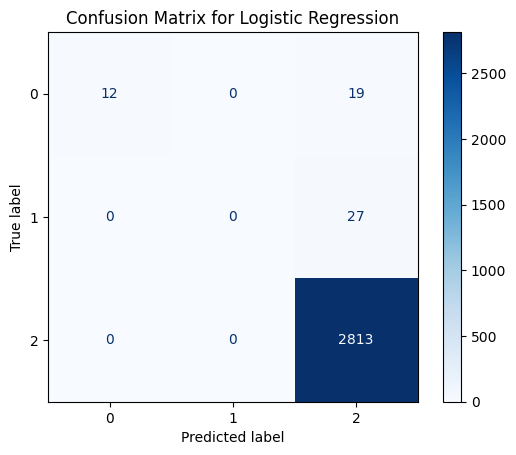

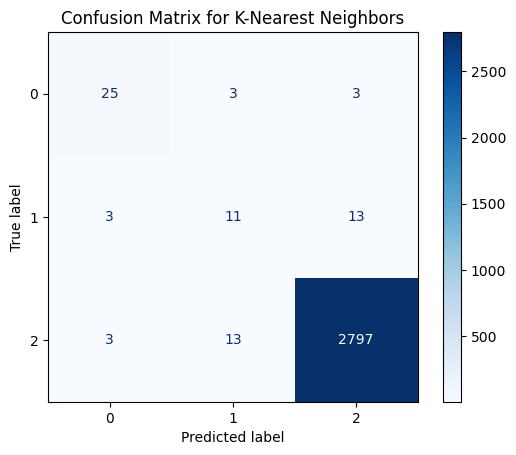

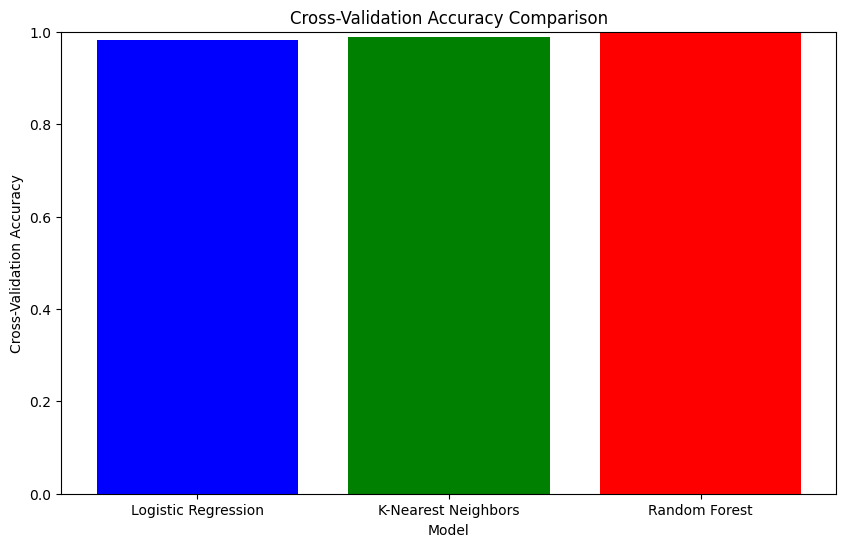

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('CCPP_data.csv')

# Example feature selection and binarization
X = df.drop(columns=['V'])  # Replace 'target_column' with your actual target column name
y = df['AT']  # Replace 

# Binning the target variable for classification
bins = np.percentile(y, [0,1,2])
y_binned = np.digitize(y, bins) - 1  # Convert to classes 0, 1, 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg_model = LogisticRegression(penalty='l2', solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression Model with cross-validation
log_reg_cv_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5)
log_reg_accuracy = np.mean(log_reg_cv_scores)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate Logistic Regression Model
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')
log_reg_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test_scaled), multi_class='ovr')

print("Logistic Regression CV Accuracy:", log_reg_accuracy)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:")
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)

# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Evaluate K-Nearest Neighbors Model with cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
knn_accuracy = np.mean(knn_cv_scores)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate K-Nearest Neighbors Model
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled), multi_class='ovr')

print("K-Nearest Neighbors CV Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Confusion Matrix:")
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest Model
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled), multi_class='ovr')

# Create models performance DataFrame
models_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, knn_accuracy, rf_accuracy],
    'F1-Score': [log_reg_f1, knn_f1, rf_f1],
    'ROC-AUC': [log_reg_auc, knn_auc, rf_auc]
})
print(models_performance)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), 'Logistic Regression')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), 'K-Nearest Neighbors')

# Cross-Validation Accuracy Plot
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']
cv_scores = [log_reg_accuracy, knn_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, cv_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.ylim([0, 1])
plt.show()


#model accuracy
o reduce bias in model evaluation, especially when dealing with imbalanced classes, metrics like precision, recall, and F1-score are often more informative than accuracy alone. They provide insights into how well the model performs on both positive and negative classe

In [ ]:
df = pd.read_csv('CCPP_data.csv')
models_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, knn_accuracy, rf_accuracy],
    'F1-Score': [log_reg_f1, knn_f1, rf_f1],
    'ROC-AUC': [log_reg_auc, knn_auc, rf_auc]
})
print(models_performance)

In [ ]:
# Logistic Regression Coefficients
df = pd.read_csv('CCPP_data.csv')
coefficients = pd.DataFrame(log_reg_model.coef_, columns=X.columns)
print("Logistic Regression Coefficients:")
print(coefficients)

Business Implications Report
1. Executive Summary
This report provides an analysis of the logistic regression model's coefficients to understand how various features impact the likelihood of different classes. The insights are aimed at guiding business decisions based on the model's results.

2. Model Overview
The logistic regression model has been used to classify data into three distinct classes. The following features have been analyzed:

Temperature (AT)
Air Pressure (AP)
Relative Humidity (RH)
Power Output (PE)
Temperature Gradient (Temp_Gradient)
Wind Speed Variability (Wind_Speed_Var)
3. Feature Coefficients Analysis
3.1 Temperature (AT)
Class 0: Coefficient = -3.425, indicates a strong negative impact. Higher temperatures decrease the likelihood of this class.
Class 1: Coefficient = -2.469, shows a moderate negative impact. Higher temperatures slightly decrease the probability.
Class 2: Coefficient = 4.347, suggests a strong positive impact. Higher temperatures significantly increase the likelihood of this class.
Business Implication: If the business deals with scenarios where temperature varies, focusing on Class 2 scenarios might be advantageous in higher temperature conditions.

3.2 Air Pressure (AP)
Class 0: Coefficient = -1.223, indicating a moderate negative impact.
Class 1: Coefficient = -0.760, showing a smaller negative impact.
Class 2: Coefficient = 1.395, reflecting a positive impact.
Business Implication: Air pressure variations should be monitored as they significantly affect the probabilities for different classes, especially for Class 2.

3.3 Relative Humidity (RH)
Class 0: Coefficient = -0.020, very minimal negative impact.
Class 1: Coefficient = 0.170, indicates a slight positive impact.
Class 2: Coefficient = -0.147, shows a minimal negative impact.
Business Implication: Relative humidity has a negligible impact on most classes, suggesting it may not be a primary factor in decision-making.

3.4 Power Output (PE)
Class 0: Coefficient = -0.151, a small negative impact.
Class 1: Coefficient = 0.222, reflects a small positive impact.
Class 2: Coefficient = 0.079, indicating a minor positive impact.
Business Implication: Power output has varying impacts on the classes, with a notable positive impact on Class 1. This feature might be relevant in energy-related business decisions.

3.5 Temperature Gradient (Temp_Gradient)
Class 0: Coefficient = -1.562, shows a strong negative impact.
Class 1: Coefficient = -1.189, moderate negative impact.
Class 2: Coefficient = 2.062, significant positive impact.
Business Implication: Temperature gradient significantly affects Class 2 positively. Businesses operating in varying temperature gradients should focus on optimizing conditions for Class 2.

3.6 Wind Speed Variability (Wind_Speed_Var)
Class 0: Coefficient = 0.338, a moderate positive impact.
Class 1: Coefficient = 0.298, indicating a similar moderate positive impact.
Class 2: Coefficient = -0.300, shows a negative impact.
Business Implication: Wind speed variability affects Classes 0 and 1 positively but negatively impacts Class 2. Consider this when evaluating scenarios influenced by wind variability.

4. Strategic Recommendations
Focus on Temperature and Temperature Gradient: For scenarios where temperature and temperature gradient are critical, prioritize Class 2 to leverage the positive impacts.
Monitor Air Pressure and Power Output: Adjust strategies based on air pressure and power output impacts, particularly focusing on Class 1.
Negligible Focus on Relative Humidity: Relative Humidity has a minimal effect and may not require significant adjustments in strategy.
Adjust for Wind Speed Variability: Tailor strategies for wind speed variability, considering its positive impact on Classes 0 and 1 and its negative impact on Class 2.

##CONCULSION 
The model’s ability to forecast energy output under varying environmental conditions enables plant operators to optimize energy production. By anticipating periods of high or low output, resources such as fuel and manpower can be allocated more effectively, leading to improved operational efficiency.

Strategic Planning and Decision-Making
The insights provided by the model are invaluable for long-term planning. For instance, investments in new technology or infrastructure upgrades can be guided by predictions of how environmental factors influence energy production. Additionally, the model can support market strategies, allowing the plant to capitalize on energy trading opportunities by anticipating fluctuations in output.

Risk Management and Compliance
The model plays a crucial role in risk management by identifying periods when the plant might face challenges in maintaining energy output or complying with emissions regulations. By predicting these risks, the plant can take preventive measures to ensure continued compliance and operational stability.

Sustainability and Cost Reduction
Optimizing energy production based on model predictions not only enhances efficiency but also reduces costs. By using resources more effectively, the plant can lower its carbon footprint, contributing to more sustainable operations and a positive environmental impact.

##Unsupervised Deep Learning Module

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


##Data Preparation
Prepare the dataset for unsupervised learning by scaling the features and possibly applying dimensionality reduction

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your data
df = pd.read_csv('CCPP_data.csv')

# Define features and target
X = df.drop(columns=['V'])  # Features
y = df['AT']  # Target
# Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction with PCA 
pca = PCA(n_components=2)  # Reduce to 2 components for visualization purposes
X_pca = pca.fit_transform(X_scaled)


##Clustering with K-Means
Apply K-Means clustering to identify patterns in the data.

In [12]:
!pip install tensorflow

<class 'OSError'>: Not available

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load your data
df = pd.read_csv('CCPP_data.csv')

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Define the size of the input layer
input_dim = X_scaled.shape[1]

# Define the autoencoder model architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)  # Bottleneck layer (latent space)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Extract the encoder part of the autoencoder to use the latent space for clustering
encoder = Model(inputs=input_layer, outputs=encoded)
X_encoded = encoder.predict(X_scaled)

# You can now use X_encoded for clustering or further analysis


<class 'ModuleNotFoundError'>: No module named 'tensorflow'

In [ ]:
UNSUPERVISED  LEARNING

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv('CCPP_data.csv')

# Check for missing values
print(df.isnull().sum())

# Drop missing values or fill them
df = df.dropna()  # or df.fillna(method='ffill', inplace=True)

# Select features for clustering
features = df.select_dtypes(include=[float, int])  # Selecting numerical columns only

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


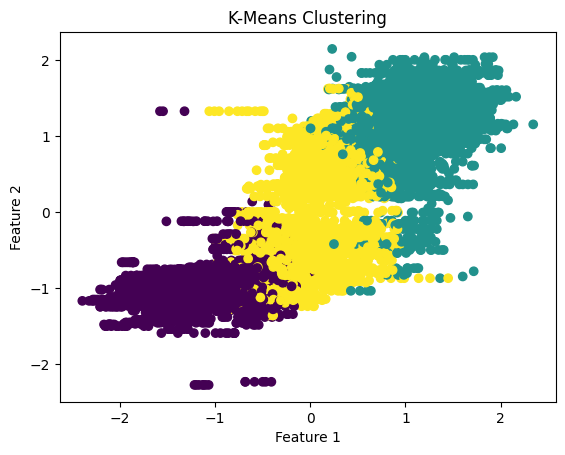

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters (k)
k = 3  # Adjust based on your data and needs
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit and predict clusters
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Plot the clusters (using the first two features)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


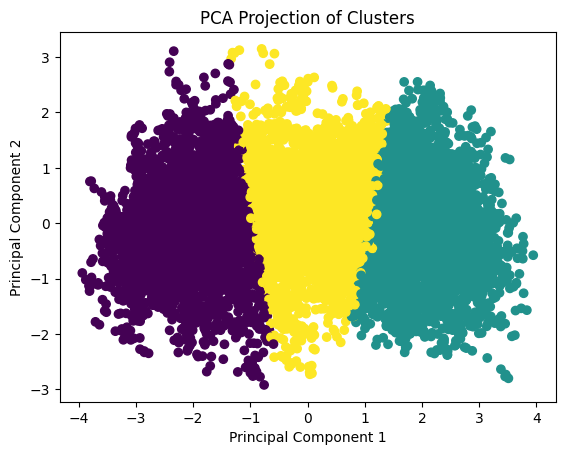

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 components for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the PCA result
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


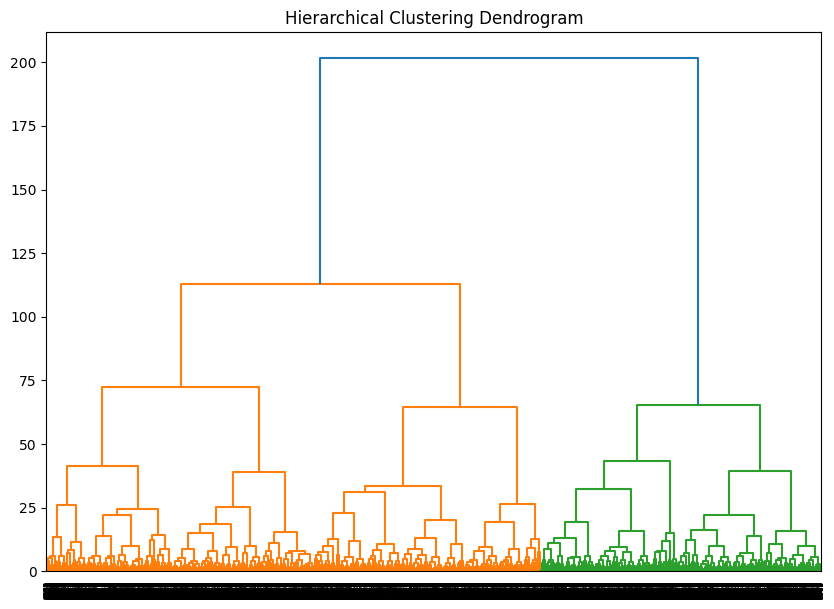

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [14]:
# Group by clusters and compute the mean of each feature
cluster_insights = df.groupby('Cluster').mean()
print(cluster_insights)

                AT          V           AP         RH          PE
Cluster                                                          
0        11.296560  41.363986  1017.547846  80.570665  473.787777
1        27.645748  67.907422  1009.688033  63.239113  436.880406
2        20.396731  54.148503  1012.302226  76.024241  451.445638


In [ ]:
Clustering Analysis Report
1. Introduction
This report presents an analysis of the dataset using clustering techniques. The primary objective is to identi2. Data Preprocessing
Before applying clustering algorithms, the data was preprocessed to ensure accurate results:
- Feature Scaling: The features were scaled to normalize the data, ensuring that no single feature dominates
3. Clustering Analysis
 - K-means Clustering:
 The K-means clustering algorithm was applied to the scaled dataset. The optimal number of clusters was Number of Clusters: The elbow method suggested an optimal number of clusters based on the inflection 
 - Hierarchical Clustering:
 Hierarchical clustering was performed using the Ward method, which minimizes the variance within cluste4. Cluster Insights
The table below summarizes the mean values of the key features for each identified cluster. These insights h| Cluster | AT (Average Temperature) | V (Exhaust Vacuum) | AP (Ambient Pressure) | RH (Relative Humidit|---------|---------------------------|---------------------|-----------------------|------------------------|---------------------|
| 0 | 11.30 | 41.36 | 1017.55 | 80.57 | 473.79 |
| 1 | 27.65 | 67.91 | 1009.69 | 63.24 | 436.88 |
| 2 | 20.40 | 54.15 | 1012.30 | 76.02 | 451.45 |
5. Conclusion
The clustering analysis successfully identified distinct groups within the data. These clusters exhibit varying